In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty_2014.csv", low_memory=False)

In [25]:
def normalizuj_kolumne(ser):
    histogram = np.bincount(ser.dropna().values.astype(int)) / ser.count()
    pdf = np.cumsum(histogram)
    pdf_interpolowana = pdf - 0.5 * histogram
    punkty_skalowanie = stats.norm.ppf(pdf_interpolowana)
    return ser.apply(lambda x: punkty_skalowanie[x] if pd.notnull(x) else x)

In [33]:
przedmioty = [col for col in df.columns if "podstawowa" in col or "rozszerzona" in col]
przedmioty_pdst = [col for col in df.columns if "podstawowa" in col]
przedmioty_rozsz = [col for col in df.columns if "rozszerzona" in col]

In [27]:
for col in df.columns:
    if col in przedmioty:
        print(col)
        df[col] = normalizuj_kolumne(df[col])

biologia_podstawowa
biologia_rozszerzona
chemia_podstawowa
chemia_rozszerzona
fizyka_podstawowa
fizyka_rozszerzona
geografia_rozszerzona
geografia_podstawowa
historia_podstawowa
historia_rozszerzona
informatyka_rozszerzona
j_angielski_rozszerzona
j_polski_rozszerzona
matematyka_rozszerzona
WOS_rozszerzona
informatyka_podstawowa
j_angielski_podstawowa
j_polski_podstawowa
matematyka_podstawowa
WOS_podstawowa


In [55]:
df.to_csv("../dane/przetworzone/sumy_laureaty_2014_znorm.csv", index=False)

In [28]:
df[przedmioty].mean()

biologia_podstawowa        0.000698
biologia_rozszerzona      -0.000229
chemia_podstawowa          0.000213
chemia_rozszerzona        -0.000150
fizyka_podstawowa          0.000702
fizyka_rozszerzona        -0.000136
geografia_rozszerzona     -0.000169
geografia_podstawowa       0.000087
historia_podstawowa        0.000036
historia_rozszerzona      -0.001195
informatyka_rozszerzona   -0.002765
j_angielski_rozszerzona   -0.000603
j_polski_rozszerzona      -0.000628
matematyka_rozszerzona     0.000358
WOS_rozszerzona           -0.000094
informatyka_podstawowa     0.000404
j_angielski_podstawowa    -0.005307
j_polski_podstawowa        0.000093
matematyka_podstawowa     -0.000333
WOS_podstawowa             0.000081
dtype: float64

In [29]:
df[przedmioty].std()

biologia_podstawowa        0.996987
biologia_rozszerzona       0.998002
chemia_podstawowa          0.997614
chemia_rozszerzona         0.997575
fizyka_podstawowa          0.997436
fizyka_rozszerzona         0.997763
geografia_rozszerzona      0.998203
geografia_podstawowa       0.998182
historia_podstawowa        0.999485
historia_rozszerzona       0.994855
informatyka_rozszerzona    0.988898
j_angielski_rozszerzona    0.997085
j_polski_rozszerzona       0.996025
matematyka_rozszerzona     0.996591
WOS_rozszerzona            0.997693
informatyka_podstawowa     0.997719
j_angielski_podstawowa     0.984637
j_polski_podstawowa        0.998803
matematyka_podstawowa      0.995751
WOS_podstawowa             0.999220
dtype: float64

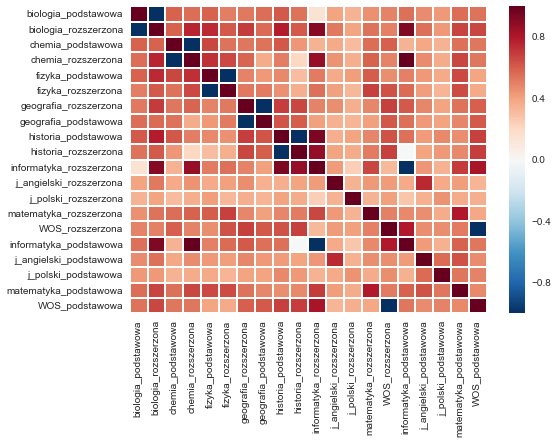

In [32]:
sns.heatmap(df[przedmioty].corr())

(array([ 16.,   0.,   0.,   2.,   4.,   2.,  18.,  54.,  54.,  50.,  50.,
         42.,  26.,  32.,   6.,   6.,   6.,   4.,   6.,  22.]),
 array([-0.00714403,  0.04321317,  0.09357037,  0.14392757,  0.19428478,
         0.24464198,  0.29499918,  0.34535638,  0.39571358,  0.44607078,
         0.49642798,  0.54678519,  0.59714239,  0.64749959,  0.69785679,
         0.74821399,  0.79857119,  0.8489284 ,  0.8992856 ,  0.9496428 ,  1.        ]),
 <a list of 20 Patch objects>)

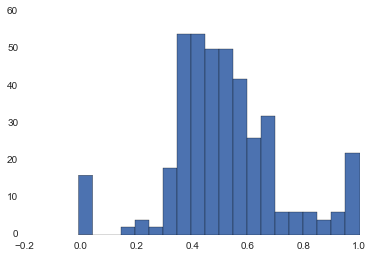

In [46]:
plt.hist(df[przedmioty].corr().fillna(0).values.flatten(), bins=20)

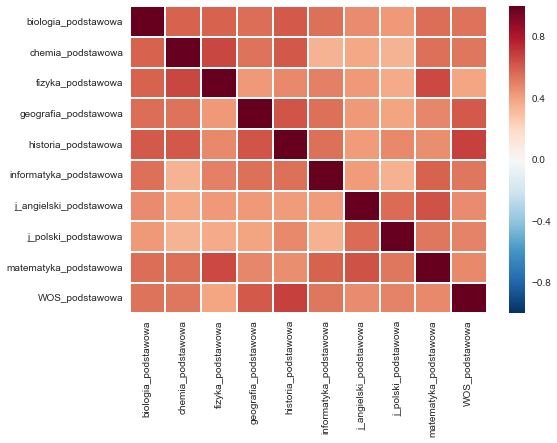

In [38]:
sns.heatmap(df[przedmioty_pdst].corr(), vmin=-1, vmax=1)

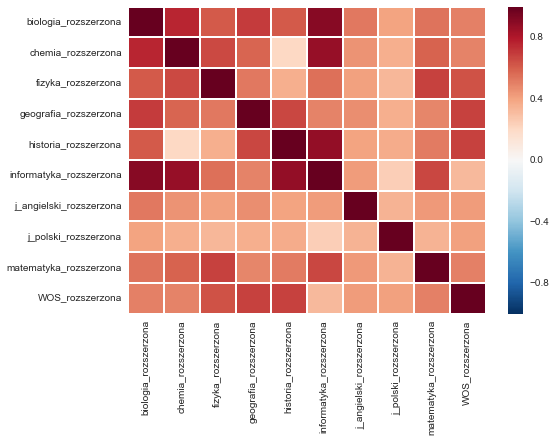

In [39]:
sns.heatmap(df[przedmioty_rozsz].corr(), vmin=-1, vmax=1)

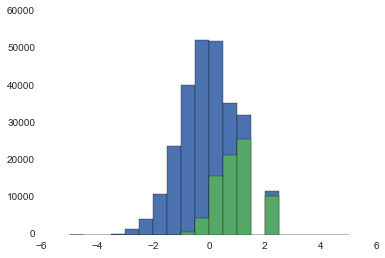

In [54]:
df["j_angielski_podstawowa"].hist(range=(-5, 5), bins=20)
df[pd.notnull(df["j_angielski_rozszerzona"])]["j_angielski_podstawowa"].hist(range=(-5, 5), bins=20)

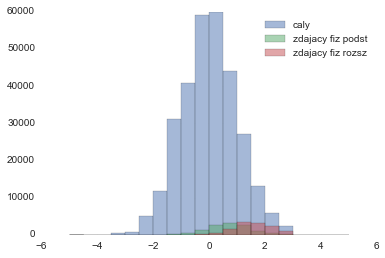

In [58]:
df["matematyka_podstawowa"] \
  .hist(range=(-5, 5), bins=20, alpha=0.5, label="caly")
df[pd.notnull(df["fizyka_podstawowa"])]["matematyka_podstawowa"] \
  .hist(range=(-5, 5), bins=20, alpha=0.5, label="zdajacy fiz podst")
df[pd.notnull(df["fizyka_rozszerzona"])]["matematyka_podstawowa"] \
  .hist(range=(-5, 5), bins=20, alpha=0.5, label="zdajacy fiz rozsz")
plt.legend()